# Análise Exploratória dos Dados

## Sumário
a) Importando as bibliotecas

b) Leitura dos arquivos

### 1. Quantidade de gols por minuto
### 2. Quantidade de gols por jogada
### 3. Chance de sair gol por jogada
### 4. Chance de sair gol de acordo com a última ação realizada antes do gol
### 5. Importância de se jogar fora ou dentro de casa 
### 6. Avaliando a temporada de um jogador de acordo com as suas chances criadas

---

#### a) Importando as bibliotecas

In [128]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import display

#### b) Leitura dos arquivos

In [119]:
df_xg = pd.read_csv('../data/processed/clean_data.csv')
print(df_xg.shape)
df_xg.head()

(362781, 24)


,league,minute,result,X,Y,xG,player,h_a,player_id,situation,...,away_team,home_goals,away_goals,date,player_assisted,lastAction,player_team,opponent_team,winner_team,half
0,Bundesliga,11,SavedShot,0.903,0.239,0.034118,Thomas Müller,h,224,OpenPlay,...,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Chipped,Bayern Munich,Wolfsburg,Bayern Munich,first
1,Bundesliga,17,SavedShot,0.852,0.277,0.030941,Arjen Robben,h,392,OpenPlay,...,Wolfsburg,2,1,2014-08-22 19:30:00,Philipp Lahm,Pass,Bayern Munich,Wolfsburg,Bayern Munich,first
2,Bundesliga,26,BlockedShot,0.803,0.277,0.021718,Arjen Robben,h,392,OpenPlay,...,Wolfsburg,2,1,2014-08-22 19:30:00,Holger Badstuber,Chipped,Bayern Munich,Wolfsburg,Bayern Munich,first
3,Bundesliga,28,SavedShot,0.871,0.324,0.050345,Thomas Müller,h,224,OpenPlay,...,Wolfsburg,2,1,2014-08-22 19:30:00,nobody,NaN,Bayern Munich,Wolfsburg,Bayern Munich,first
4,Bundesliga,29,SavedShot,0.918,0.531,0.111078,Robert Lewandowski,h,227,OpenPlay,...,Wolfsburg,2,1,2014-08-22 19:30:00,Gianluca Gaudino,Chipped,Bayern Munich,Wolfsburg,Bayern Munich,first


Todas as análises desse notebook serão relacionadas à temporada de 2021 da principal liga da Inglaterra, a Premier League. Selecionamos uma temporada de uma liga específica para termos análises que se conversam entre si.

### 1. Quantidade de gols por minuto

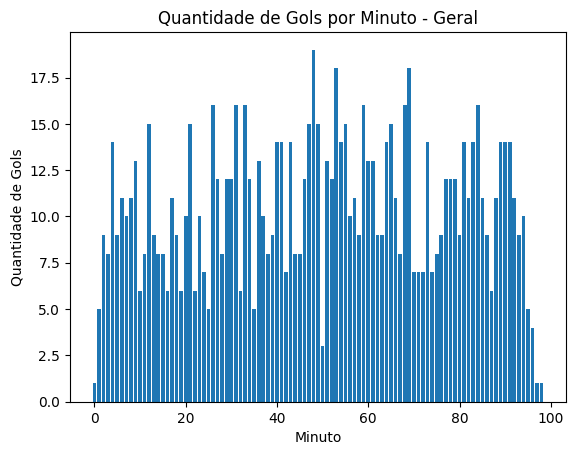

,half,result
0,first,450
1,second,587


In [120]:
# Filtro do df
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'EPL')&(df_xg.season == 2021)]
df_plot = df_filt.groupby("minute")["result"].count().reset_index()

# Plot
plt.bar(df_plot.minute, df_plot.result)

# Adicionar rótulos e título
plt.xlabel('Minuto')
plt.ylabel('Quantidade de Gols')
plt.title('Quantidade de Gols por Minuto - Geral')

# Exibir o gráfico
plt.show()

df_filt.groupby("half")["result"].count().reset_index()

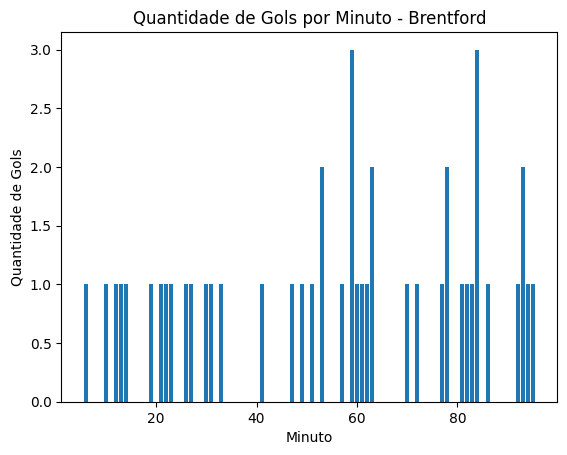

,half,result
0,first,15
1,second,31


--------------------------------------------------------------------------------


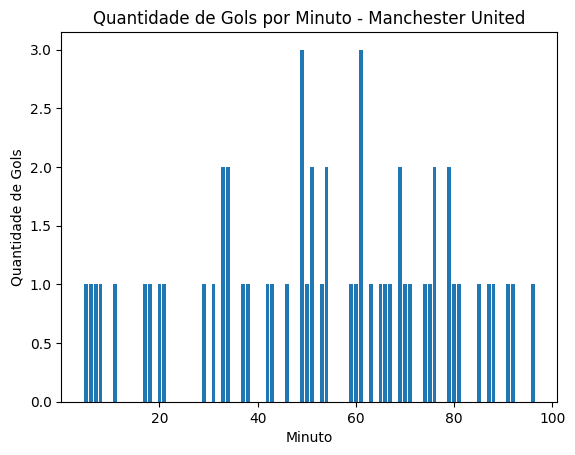

,half,result
0,first,19
1,second,37


--------------------------------------------------------------------------------


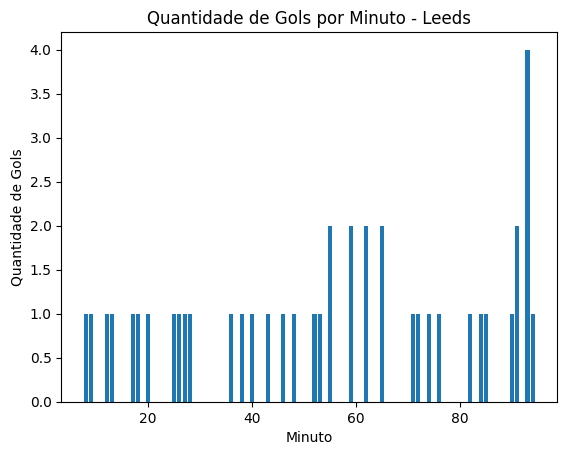

,half,result
0,first,15
1,second,27


--------------------------------------------------------------------------------


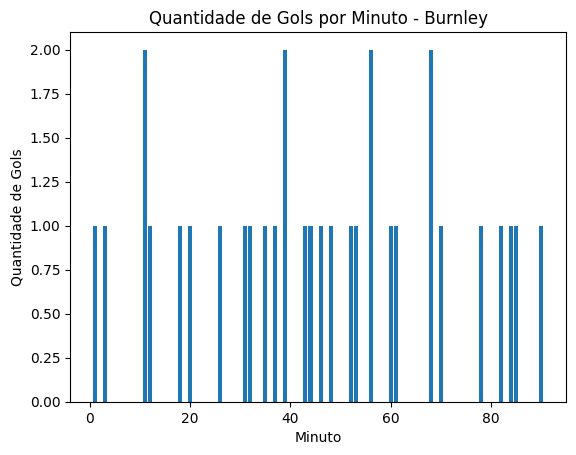

,half,result
0,first,16
1,second,16


--------------------------------------------------------------------------------


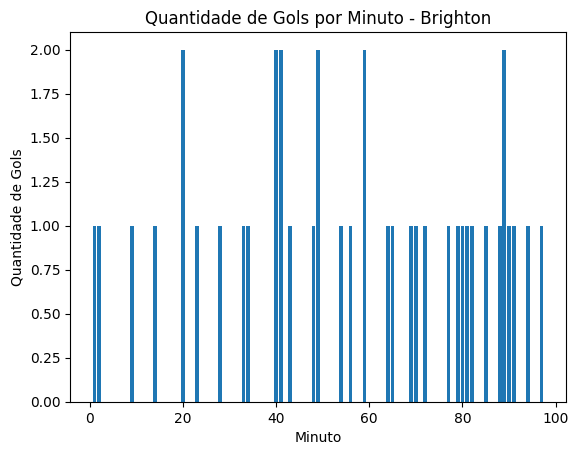

,half,result
0,first,15
1,second,25


--------------------------------------------------------------------------------


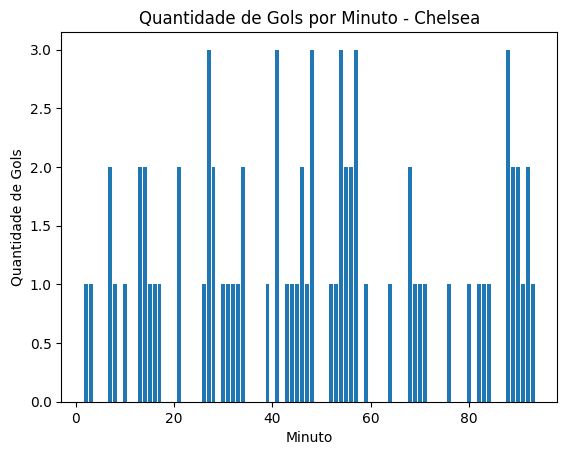

,half,result
0,first,34
1,second,41


--------------------------------------------------------------------------------


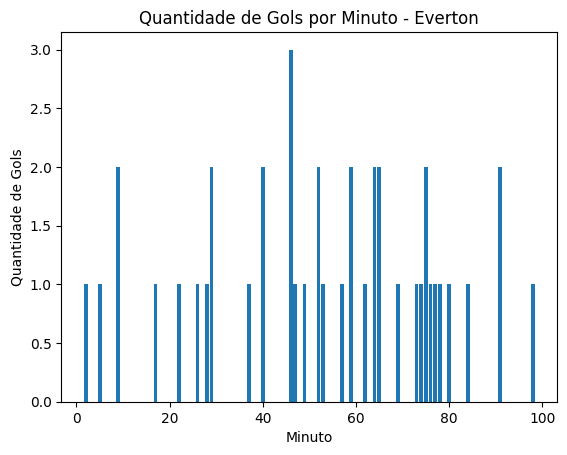

,half,result
0,first,13
1,second,29


--------------------------------------------------------------------------------


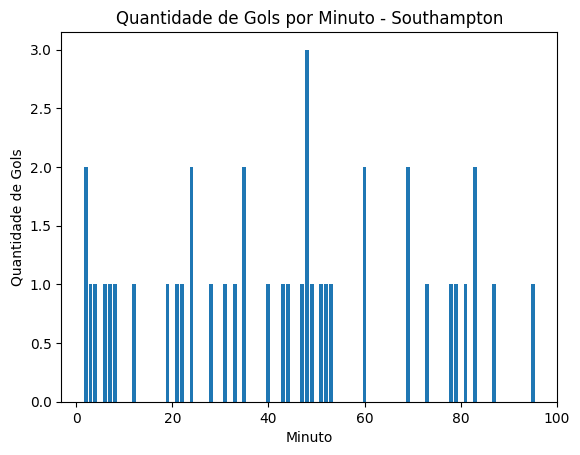

,half,result
0,first,21
1,second,20


--------------------------------------------------------------------------------


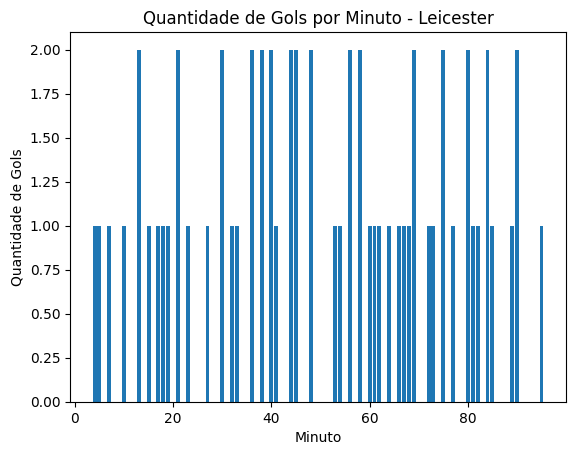

,half,result
0,first,29
1,second,33


--------------------------------------------------------------------------------


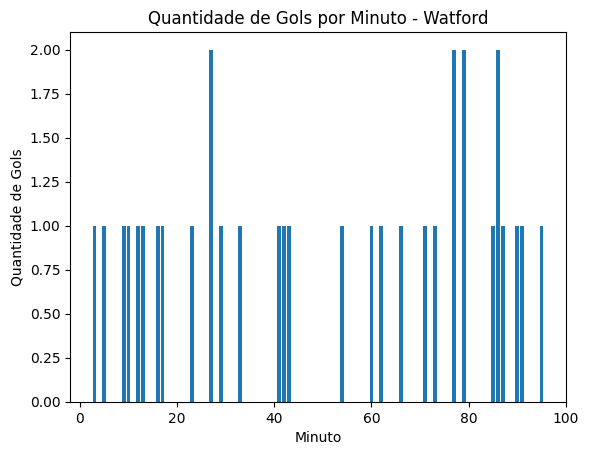

,half,result
0,first,16
1,second,17


--------------------------------------------------------------------------------


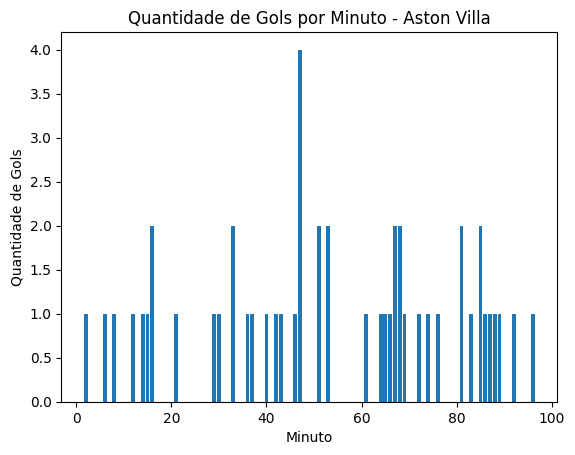

,half,result
0,first,18
1,second,32


--------------------------------------------------------------------------------


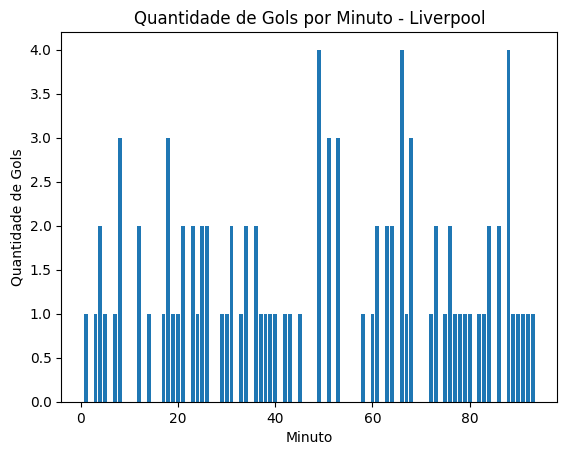

,half,result
0,first,43
1,second,51


--------------------------------------------------------------------------------


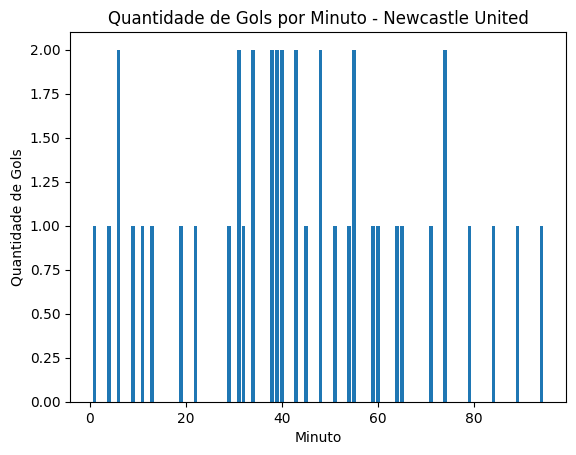

,half,result
0,first,24
1,second,17


--------------------------------------------------------------------------------


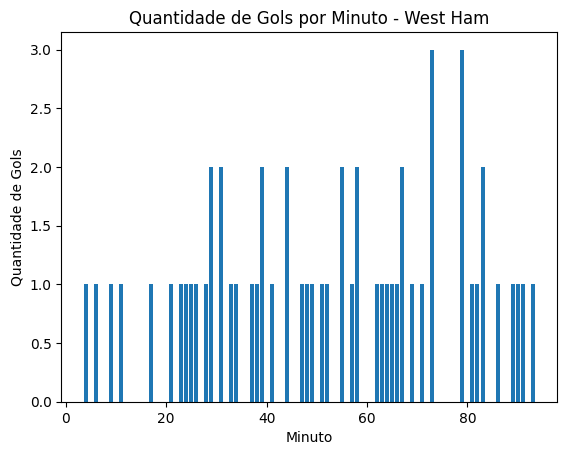

,half,result
0,first,24
1,second,34


--------------------------------------------------------------------------------


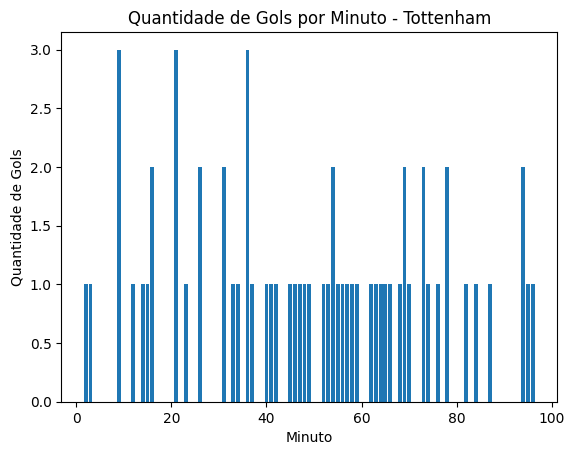

,half,result
0,first,28
1,second,35


--------------------------------------------------------------------------------


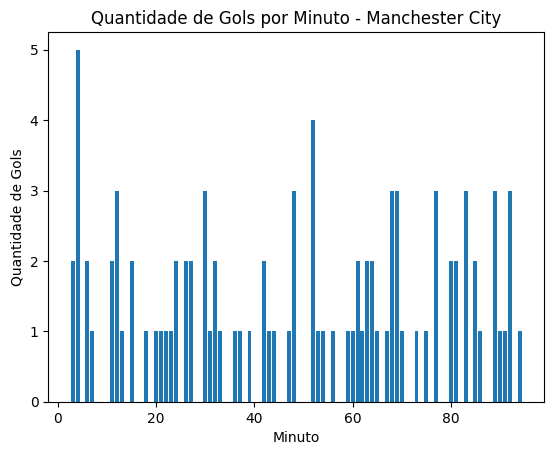

,half,result
0,first,43
1,second,53


--------------------------------------------------------------------------------


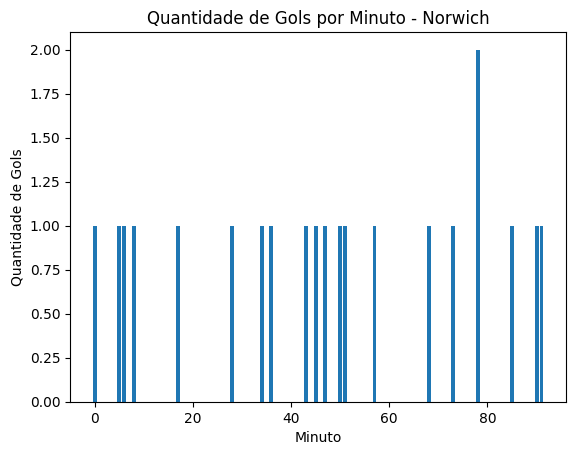

,half,result
0,first,10
1,second,11


--------------------------------------------------------------------------------


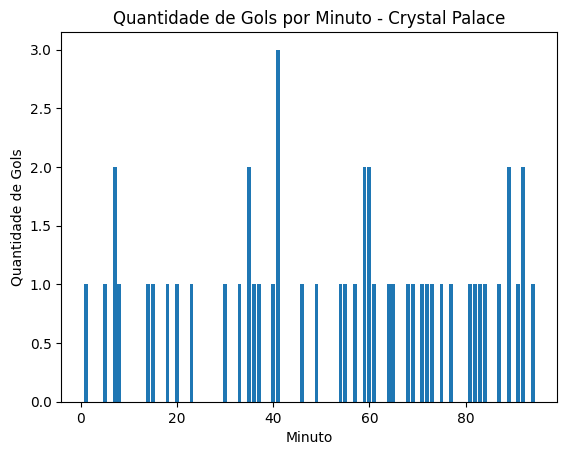

,half,result
0,first,20
1,second,30


--------------------------------------------------------------------------------


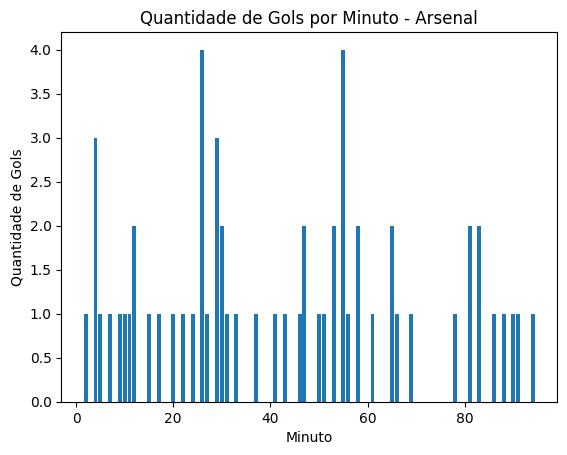

,half,result
0,first,31
1,second,29


--------------------------------------------------------------------------------


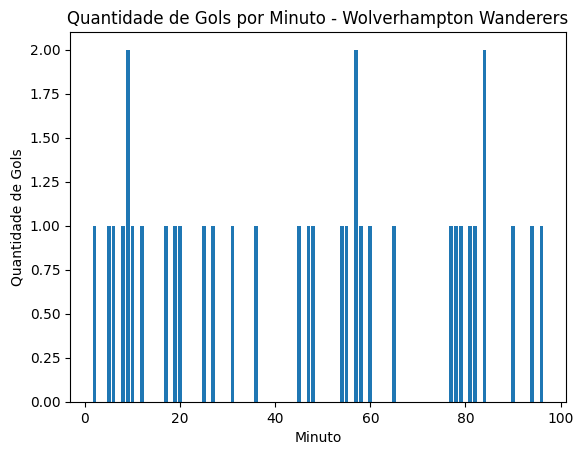

,half,result
0,first,16
1,second,19


--------------------------------------------------------------------------------


In [121]:
# Análise time por time
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'EPL')&(df_xg.season == 2021)]
teams = df_filt.player_team.unique()
for t in teams:
    df_aux = df_filt[df_filt.player_team == t]
    df_plot = df_aux.groupby("minute")["result"].count().reset_index()

    # Plot
    plt.bar(df_plot.minute, df_plot.result)

    # Adicionar rótulos e título
    plt.xlabel('Minuto')
    plt.ylabel('Quantidade de Gols')
    plt.title(f'Quantidade de Gols por Minuto - {t}')

    # Exibir o gráfico
    plt.show()

    display(df_aux.groupby("half")["result"].count().reset_index())
    print("-"*80)

##### Insights:
- A variável 'minuto' analisada de forma geral acaba não tendo muita relação na quantidade de gols marcados
- Analisando time por time, alguns times possuem uma tendência maior em marcar em certos momentos do jogo, mas na maioria dos casos a variável 'minuto' acaba não tendo muita relação com a quantidade de gols.
- Em relação aos tempos(1º e 2º), tendência maior em sair gols na segunda metade analisando tanto de forma geral quanto de forma desdobrada entre as equipes

### 2. Quantidade de gols por jogada

In [141]:
# Filtro do df
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'EPL')&(df_xg.season == 2021)]
df_plot = df_filt.groupby("situation")["result"].count().reset_index()

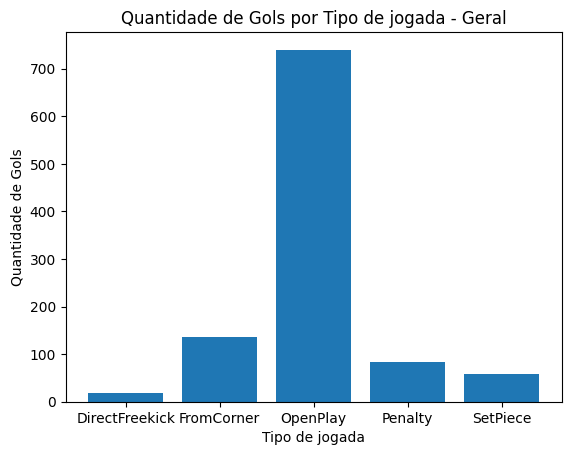

In [143]:
plt.bar(df_plot.situation, df_plot.result)

# Adicionar rótulos e título
plt.xlabel('Tipo de jogada')
plt.ylabel('Quantidade de Gols')
plt.title('Quantidade de Gols por Tipo de jogada - Geral')

# Exibir o gráfico
plt.show()

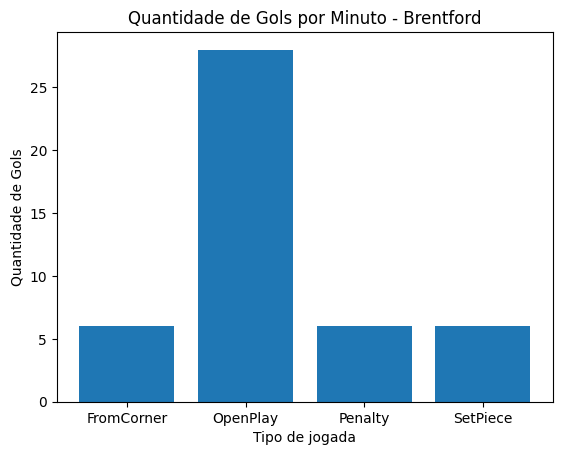

,situation,result,perc
0,FromCorner,6,0.13
1,OpenPlay,28,0.61
2,Penalty,6,0.13
3,SetPiece,6,0.13


--------------------------------------------------------------------------------


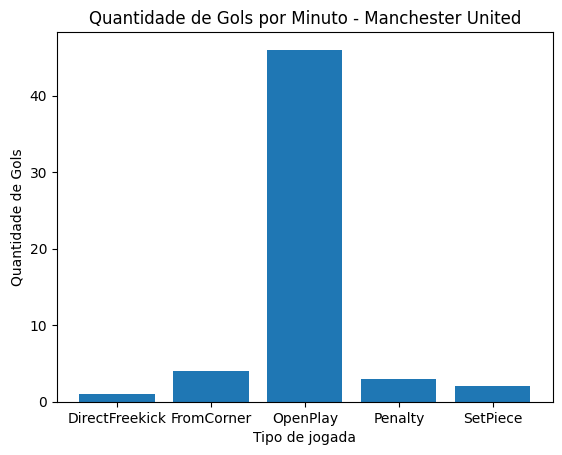

,situation,result,perc
0,DirectFreekick,1,0.02
1,FromCorner,4,0.07
2,OpenPlay,46,0.82
3,Penalty,3,0.05
4,SetPiece,2,0.04


--------------------------------------------------------------------------------


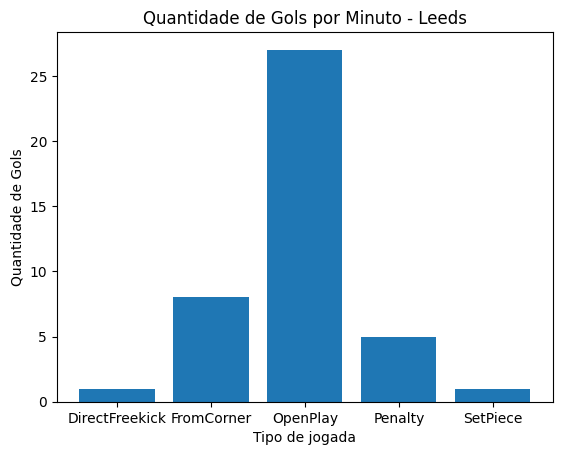

,situation,result,perc
0,DirectFreekick,1,0.02
1,FromCorner,8,0.19
2,OpenPlay,27,0.64
3,Penalty,5,0.12
4,SetPiece,1,0.02


--------------------------------------------------------------------------------


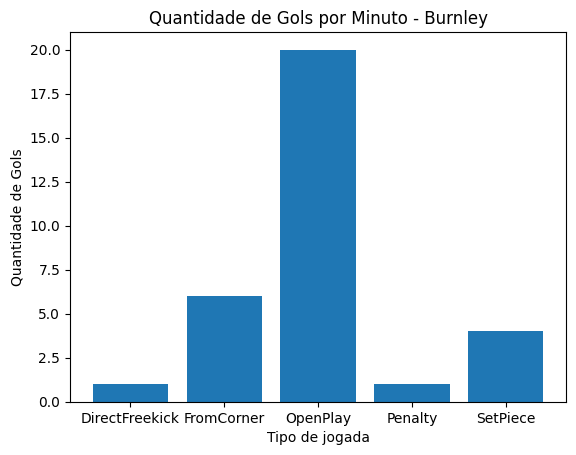

,situation,result,perc
0,DirectFreekick,1,0.03
1,FromCorner,6,0.19
2,OpenPlay,20,0.62
3,Penalty,1,0.03
4,SetPiece,4,0.12


--------------------------------------------------------------------------------


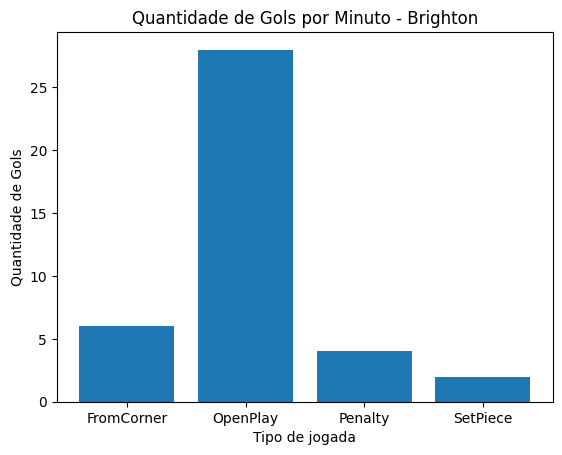

,situation,result,perc
0,FromCorner,6,0.15
1,OpenPlay,28,0.70
2,Penalty,4,0.10
3,SetPiece,2,0.05


--------------------------------------------------------------------------------


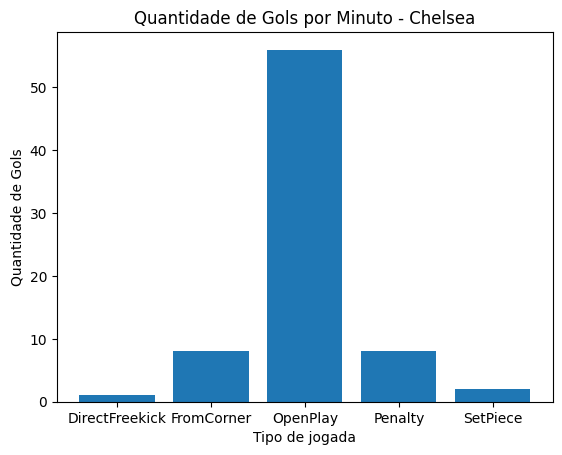

,situation,result,perc
0,DirectFreekick,1,0.01
1,FromCorner,8,0.11
2,OpenPlay,56,0.75
3,Penalty,8,0.11
4,SetPiece,2,0.03


--------------------------------------------------------------------------------


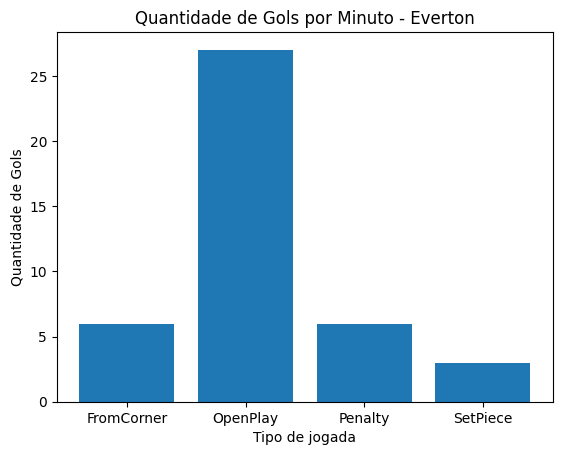

,situation,result,perc
0,FromCorner,6,0.14
1,OpenPlay,27,0.64
2,Penalty,6,0.14
3,SetPiece,3,0.07


--------------------------------------------------------------------------------


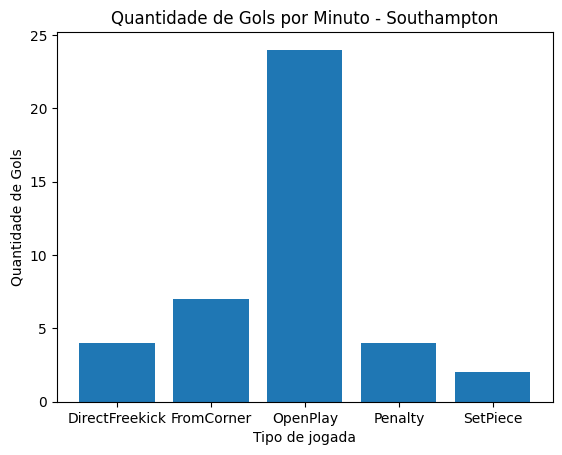

,situation,result,perc
0,DirectFreekick,4,0.10
1,FromCorner,7,0.17
2,OpenPlay,24,0.59
3,Penalty,4,0.10
4,SetPiece,2,0.05


--------------------------------------------------------------------------------


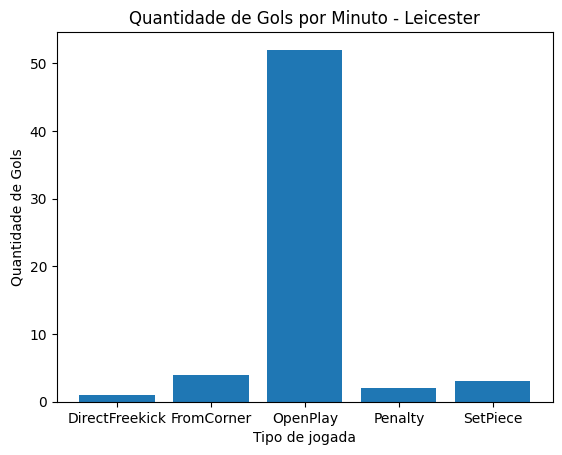

,situation,result,perc
0,DirectFreekick,1,0.02
1,FromCorner,4,0.06
2,OpenPlay,52,0.84
3,Penalty,2,0.03
4,SetPiece,3,0.05


--------------------------------------------------------------------------------


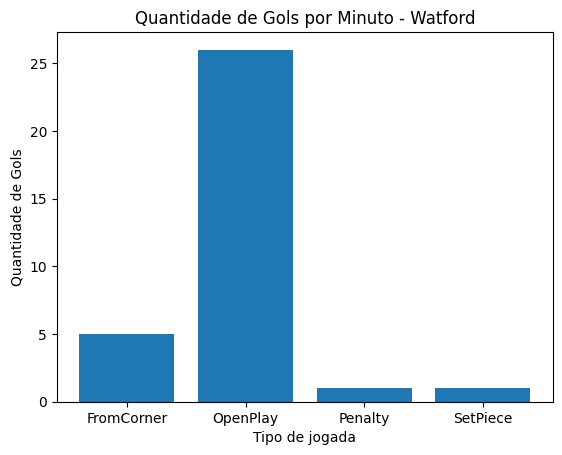

,situation,result,perc
0,FromCorner,5,0.15
1,OpenPlay,26,0.79
2,Penalty,1,0.03
3,SetPiece,1,0.03


--------------------------------------------------------------------------------


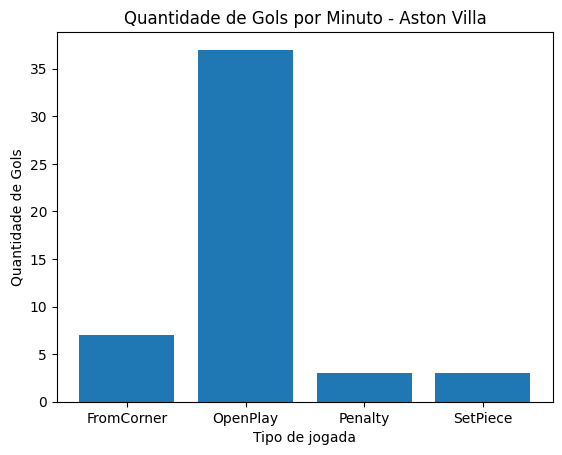

,situation,result,perc
0,FromCorner,7,0.14
1,OpenPlay,37,0.74
2,Penalty,3,0.06
3,SetPiece,3,0.06


--------------------------------------------------------------------------------


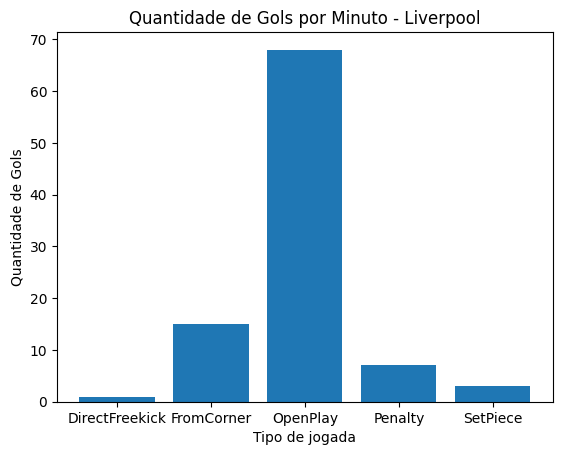

,situation,result,perc
0,DirectFreekick,1,0.01
1,FromCorner,15,0.16
2,OpenPlay,68,0.72
3,Penalty,7,0.07
4,SetPiece,3,0.03


--------------------------------------------------------------------------------


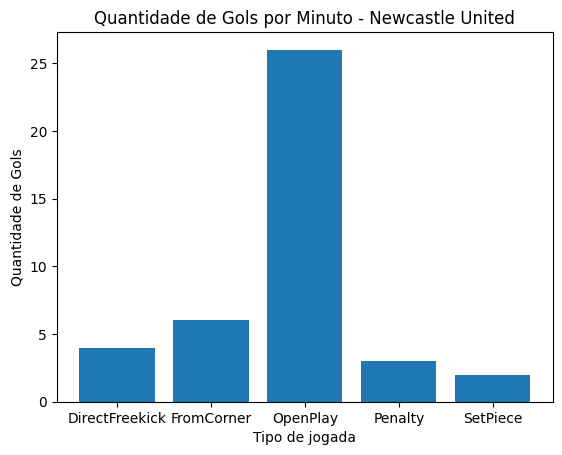

,situation,result,perc
0,DirectFreekick,4,0.10
1,FromCorner,6,0.15
2,OpenPlay,26,0.63
3,Penalty,3,0.07
4,SetPiece,2,0.05


--------------------------------------------------------------------------------


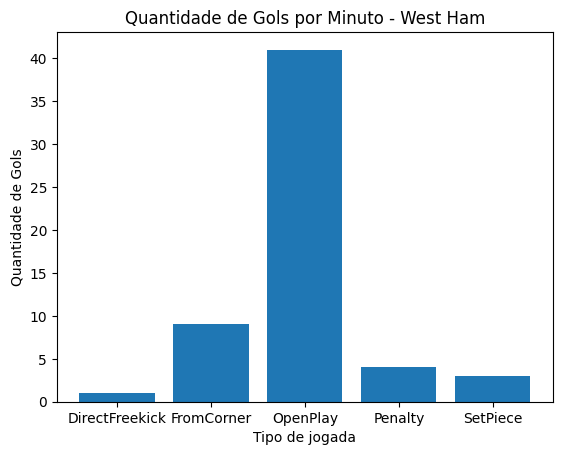

,situation,result,perc
0,DirectFreekick,1,0.02
1,FromCorner,9,0.16
2,OpenPlay,41,0.71
3,Penalty,4,0.07
4,SetPiece,3,0.05


--------------------------------------------------------------------------------


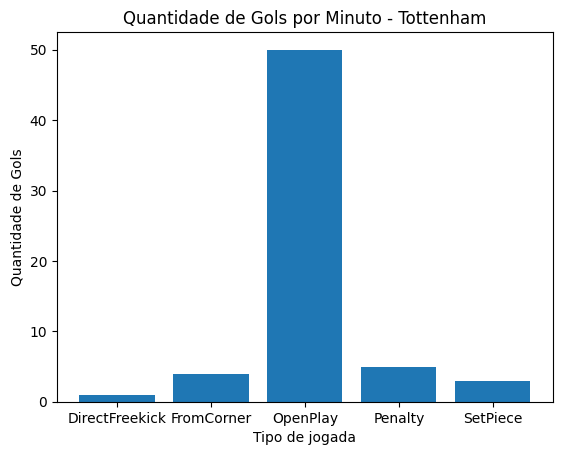

,situation,result,perc
0,DirectFreekick,1,0.02
1,FromCorner,4,0.06
2,OpenPlay,50,0.79
3,Penalty,5,0.08
4,SetPiece,3,0.05


--------------------------------------------------------------------------------


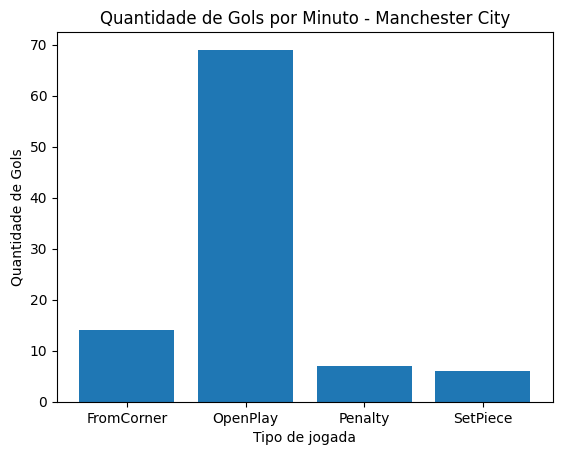

,situation,result,perc
0,FromCorner,14,0.15
1,OpenPlay,69,0.72
2,Penalty,7,0.07
3,SetPiece,6,0.06


--------------------------------------------------------------------------------


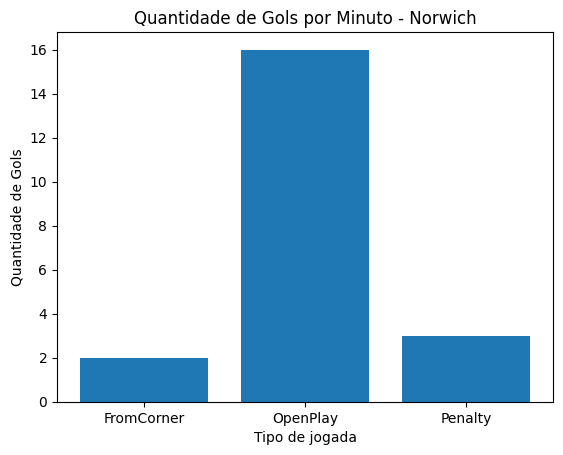

,situation,result,perc
0,FromCorner,2,0.10
1,OpenPlay,16,0.76
2,Penalty,3,0.14


--------------------------------------------------------------------------------


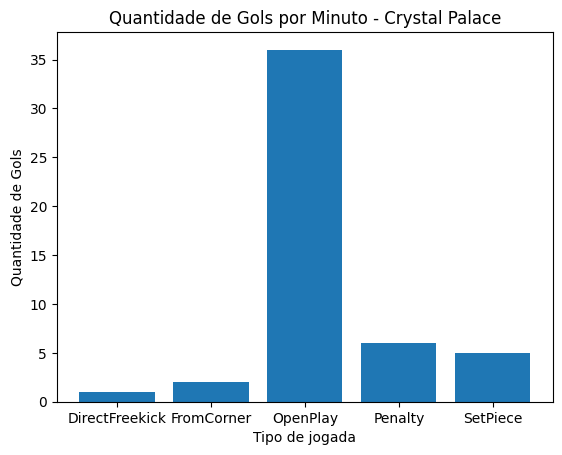

,situation,result,perc
0,DirectFreekick,1,0.02
1,FromCorner,2,0.04
2,OpenPlay,36,0.72
3,Penalty,6,0.12
4,SetPiece,5,0.10


--------------------------------------------------------------------------------


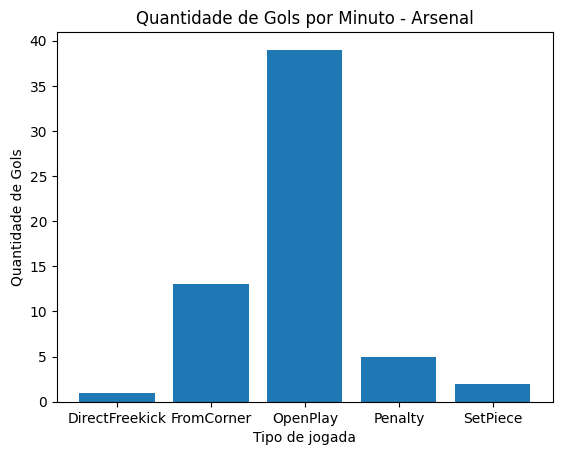

,situation,result,perc
0,DirectFreekick,1,0.02
1,FromCorner,13,0.22
2,OpenPlay,39,0.65
3,Penalty,5,0.08
4,SetPiece,2,0.03


--------------------------------------------------------------------------------


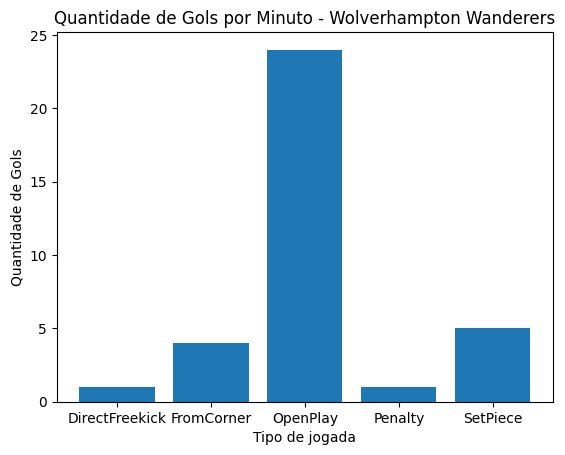

,situation,result,perc
0,DirectFreekick,1,0.03
1,FromCorner,4,0.11
2,OpenPlay,24,0.69
3,Penalty,1,0.03
4,SetPiece,5,0.14


--------------------------------------------------------------------------------


In [125]:
# Análise time por time
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'EPL')&(df_xg.season == 2021)]
for t in teams:
    df_aux = df_filt[df_filt.player_team == t]
    df_plot = df_aux.groupby("situation")["result"].count().reset_index()

    # Plot
    plt.bar(df_plot.situation, df_plot.result)

    # Adicionar rótulos e título
    plt.xlabel('Tipo de jogada')
    plt.ylabel('Quantidade de Gols')
    plt.title(f'Quantidade de Gols por Minuto - {t}')

    # Exibir o gráfico
    plt.show()

    df_display = df_aux.groupby("situation")["result"].count().reset_index()
    df_display['perc'] = round(df_display.result/sum(df_display.result),2)
    display(df_display)
    print("-"*80)

##### Insights:
- Aconteceu o que já era de se esperar, o tipo de jogada com mais gols foi o 'OpenPlay' que seria com a bola rolando.
- Vale destacar a importância das jogadas de escanteio para alguns times, onde cerca de 15-25% dos gols são marcados nesse estilo.

### 3. Chance de sair gol por jogada

In [102]:
# Análise Geral
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'EPL')&(df_xg.season == 2021)]
df_filt = df_filt.groupby("situation")["xG"].mean().reset_index()
df_filt

,situation,xG
0,DirectFreekick,0.065159
1,FromCorner,0.310515
2,OpenPlay,0.304315
3,Penalty,0.761167
4,SetPiece,0.328949


In [103]:
# Análise time por time
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'EPL')&(df_xg.season == 2021)]
for t in teams:
    df_aux = df_filt[df_filt.player_team == t]
    print(f'> {t.upper()}')
    display(df_aux.groupby("situation")["xG"].mean().reset_index().sort_values('xG', ascending=False))
    print('-'*80)

> BRENTFORD


,situation,xG
2,Penalty,0.761163
3,SetPiece,0.343592
1,OpenPlay,0.324188
0,FromCorner,0.304372


--------------------------------------------------------------------------------
> MANCHESTER UNITED


,situation,xG
3,Penalty,0.761169
2,OpenPlay,0.322228
4,SetPiece,0.227593
1,FromCorner,0.057861
0,DirectFreekick,0.033755


--------------------------------------------------------------------------------
> LEEDS


,situation,xG
3,Penalty,0.761169
1,FromCorner,0.377331
2,OpenPlay,0.329449
4,SetPiece,0.092781
0,DirectFreekick,0.034504


--------------------------------------------------------------------------------
> BURNLEY


,situation,xG
3,Penalty,0.761169
1,FromCorner,0.471585
2,OpenPlay,0.318054
4,SetPiece,0.170063
0,DirectFreekick,0.043799


--------------------------------------------------------------------------------
> BRIGHTON


,situation,xG
2,Penalty,0.761169
0,FromCorner,0.365927
3,SetPiece,0.319462
1,OpenPlay,0.263585


--------------------------------------------------------------------------------
> CHELSEA


,situation,xG
3,Penalty,0.761169
2,OpenPlay,0.280690
1,FromCorner,0.220977
0,DirectFreekick,0.062424
4,SetPiece,0.028392


--------------------------------------------------------------------------------
> EVERTON


,situation,xG
2,Penalty,0.761157
3,SetPiece,0.441618
1,OpenPlay,0.272026
0,FromCorner,0.237465


--------------------------------------------------------------------------------
> SOUTHAMPTON


,situation,xG
3,Penalty,0.761169
4,SetPiece,0.338385
1,FromCorner,0.266388
2,OpenPlay,0.251896
0,DirectFreekick,0.056315


--------------------------------------------------------------------------------
> LEICESTER


,situation,xG
3,Penalty,0.761169
4,SetPiece,0.373883
1,FromCorner,0.308964
2,OpenPlay,0.296807
0,DirectFreekick,0.078922


--------------------------------------------------------------------------------
> WATFORD


,situation,xG
3,SetPiece,0.787843
2,Penalty,0.761169
0,FromCorner,0.238551
1,OpenPlay,0.224330


--------------------------------------------------------------------------------
> ASTON VILLA


,situation,xG
2,Penalty,0.761169
1,OpenPlay,0.248142
0,FromCorner,0.176238
3,SetPiece,0.080745


--------------------------------------------------------------------------------
> LIVERPOOL


,situation,xG
3,Penalty,0.761169
2,OpenPlay,0.419993
1,FromCorner,0.391882
4,SetPiece,0.373279
0,DirectFreekick,0.114070


--------------------------------------------------------------------------------
> NEWCASTLE UNITED


,situation,xG
3,Penalty,0.761169
2,OpenPlay,0.310300
1,FromCorner,0.193469
0,DirectFreekick,0.094623
4,SetPiece,0.077654


--------------------------------------------------------------------------------
> WEST HAM


,situation,xG
3,Penalty,0.761169
4,SetPiece,0.520631
1,FromCorner,0.388473
2,OpenPlay,0.301995
0,DirectFreekick,0.050973


--------------------------------------------------------------------------------
> TOTTENHAM


,situation,xG
3,Penalty,0.761169
1,FromCorner,0.494034
4,SetPiece,0.453903
2,OpenPlay,0.326200
0,DirectFreekick,0.027736


--------------------------------------------------------------------------------
> MANCHESTER CITY


,situation,xG
2,Penalty,0.761169
3,SetPiece,0.447412
1,OpenPlay,0.342406
0,FromCorner,0.299586


--------------------------------------------------------------------------------
> NORWICH


,situation,xG
2,Penalty,0.761157
1,OpenPlay,0.246432
0,FromCorner,0.067248


--------------------------------------------------------------------------------
> CRYSTAL PALACE


,situation,xG
3,Penalty,0.761169
4,SetPiece,0.496282
1,FromCorner,0.352748
2,OpenPlay,0.269435
0,DirectFreekick,0.050226


--------------------------------------------------------------------------------
> ARSENAL


,situation,xG
3,Penalty,0.761169
1,FromCorner,0.315846
4,SetPiece,0.257346
2,OpenPlay,0.252817
0,DirectFreekick,0.079565


--------------------------------------------------------------------------------
> WOLVERHAMPTON WANDERERS


,situation,xG
3,Penalty,0.761169
1,FromCorner,0.439371
2,OpenPlay,0.277182
4,SetPiece,0.212181
0,DirectFreekick,0.058296


--------------------------------------------------------------------------------


##### Insights:
- Situação de pênalti sempre terá uma maior probabilidade de gol sendo uma das chances mais claras de gol dentro de uma partida.
- Vale ressaltar como as outras situações variam bastante de time para time, onde uma equipe possui mais ou menos chances de fazer gol comparando com outro relacionados à mesma situação.

### 4. Chance de sair gol de acordo com a última ação realizada antes do gol

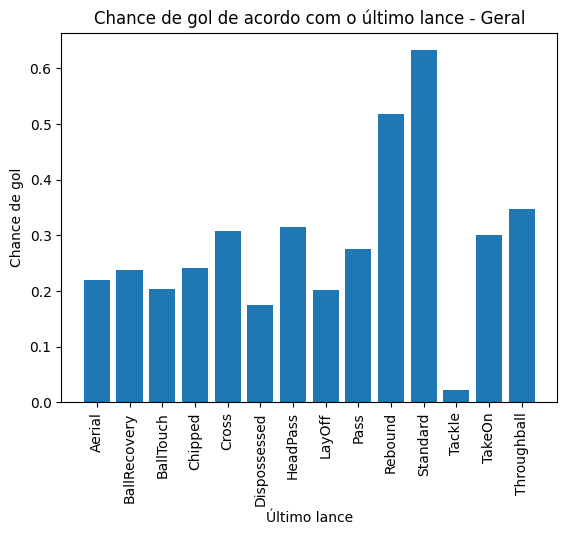

In [147]:
df_filt = df_xg[(df_xg.result == 'Goal')&(df_xg.league == 'EPL')&(df_xg.season == 2021)]
df_plot = df_filt.groupby("lastAction")["xG"].mean().reset_index()

plt.bar(df_plot.lastAction, df_plot.xG)

# Adicionar rótulos e título
plt.xlabel('Último lance')
plt.ylabel('Chance de gol')
plt.title(f'Chance de gol de acordo com o último lance - Geral')
plt.xticks(rotation='vertical')

# Exibir o gráfico
plt.show()

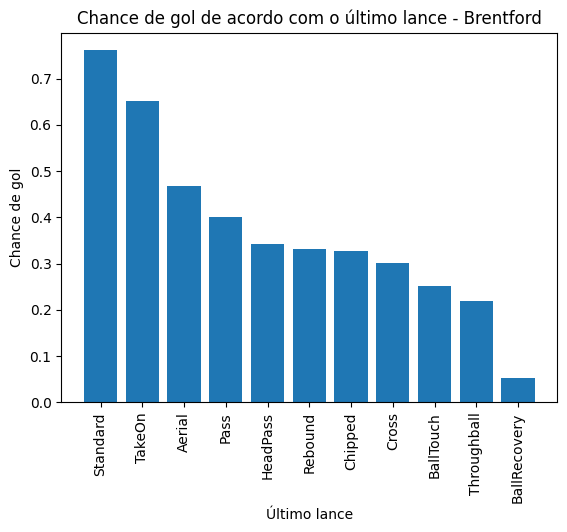

,lastAction,xG
8,Standard,0.761163
9,TakeOn,0.651100
0,Aerial,0.467368
6,Pass,0.399955
5,HeadPass,0.343023
7,Rebound,0.331869
3,Chipped,0.326347
4,Cross,0.301540
2,BallTouch,0.252093
10,Throughball,0.219781


--------------------------------------------------------------------------------


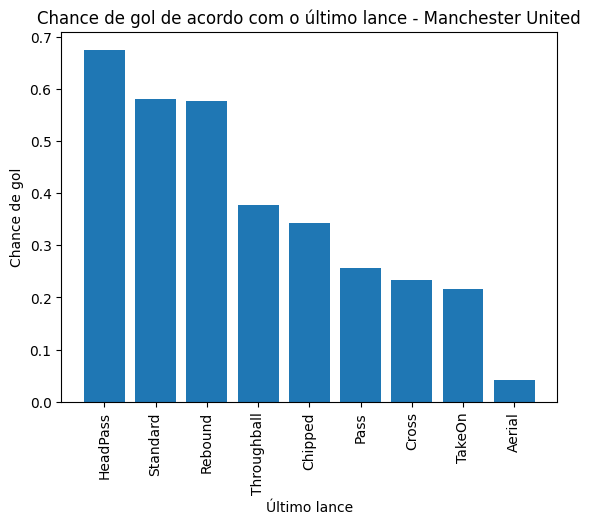

,lastAction,xG
3,HeadPass,0.674433
6,Standard,0.579315
5,Rebound,0.576883
8,Throughball,0.377094
1,Chipped,0.343538
4,Pass,0.255752
2,Cross,0.233823
7,TakeOn,0.216630
0,Aerial,0.040912


--------------------------------------------------------------------------------


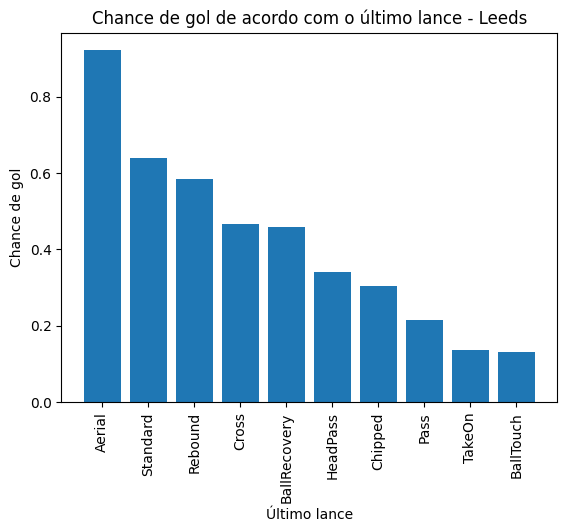

,lastAction,xG
0,Aerial,0.920981
8,Standard,0.640058
7,Rebound,0.585095
4,Cross,0.467758
1,BallRecovery,0.458677
5,HeadPass,0.340542
3,Chipped,0.303347
6,Pass,0.216662
9,TakeOn,0.138107
2,BallTouch,0.131358


--------------------------------------------------------------------------------


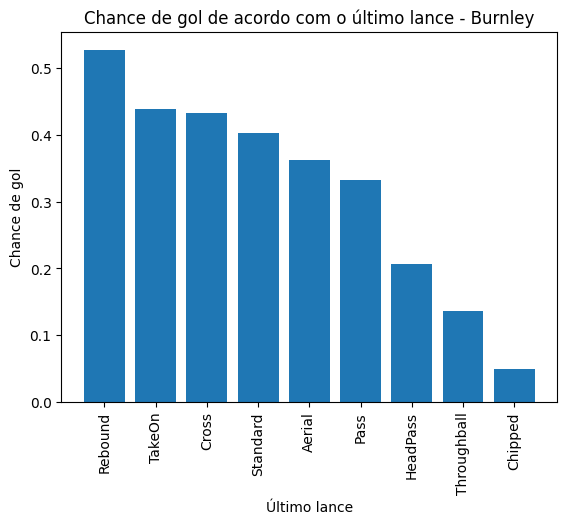

,lastAction,xG
5,Rebound,0.527741
7,TakeOn,0.438418
2,Cross,0.432756
6,Standard,0.402484
0,Aerial,0.362932
4,Pass,0.332575
3,HeadPass,0.206609
8,Throughball,0.136901
1,Chipped,0.048589


--------------------------------------------------------------------------------


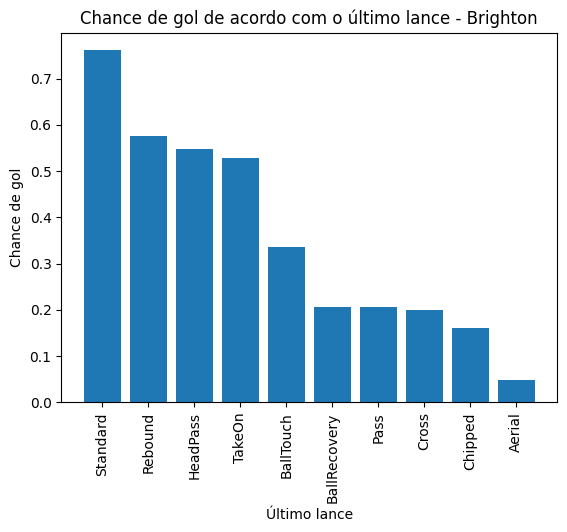

,lastAction,xG
8,Standard,0.761169
7,Rebound,0.576483
5,HeadPass,0.547316
9,TakeOn,0.527579
2,BallTouch,0.335829
1,BallRecovery,0.207015
6,Pass,0.206507
4,Cross,0.199295
3,Chipped,0.159843
0,Aerial,0.048198


--------------------------------------------------------------------------------


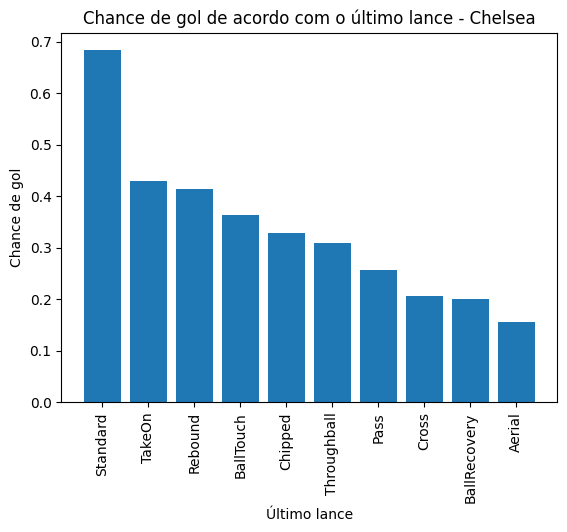

,lastAction,xG
7,Standard,0.683531
8,TakeOn,0.429284
6,Rebound,0.413325
2,BallTouch,0.364092
3,Chipped,0.328894
9,Throughball,0.308577
5,Pass,0.256444
4,Cross,0.205906
1,BallRecovery,0.199933
0,Aerial,0.155618


--------------------------------------------------------------------------------


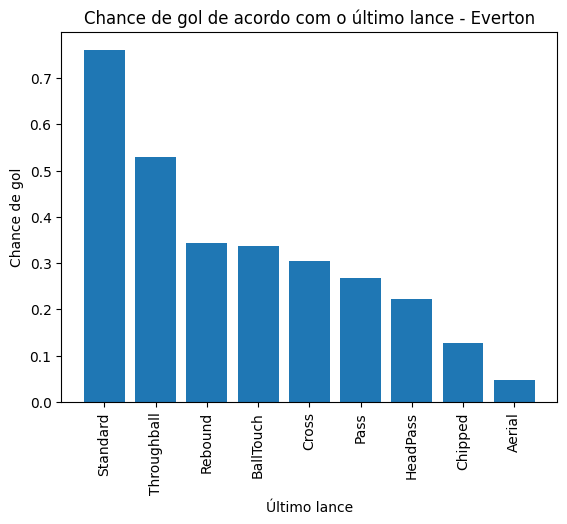

,lastAction,xG
7,Standard,0.761157
8,Throughball,0.529703
6,Rebound,0.344036
1,BallTouch,0.335965
3,Cross,0.304789
5,Pass,0.267392
4,HeadPass,0.221864
2,Chipped,0.127044
0,Aerial,0.046874


--------------------------------------------------------------------------------


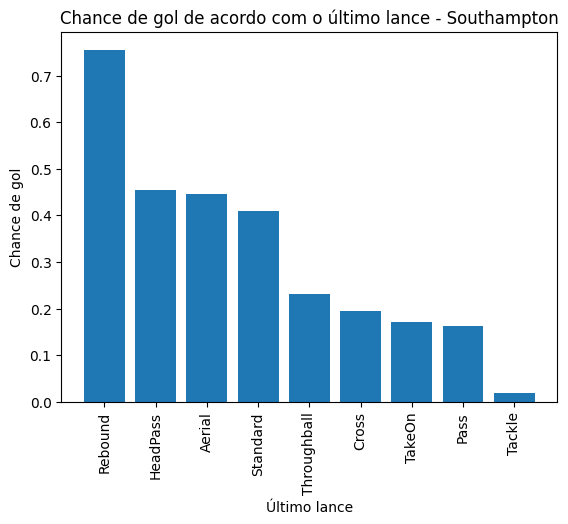

,lastAction,xG
4,Rebound,0.755125
2,HeadPass,0.454869
0,Aerial,0.445222
5,Standard,0.408742
8,Throughball,0.230805
1,Cross,0.195304
7,TakeOn,0.171134
3,Pass,0.163564
6,Tackle,0.017918


--------------------------------------------------------------------------------


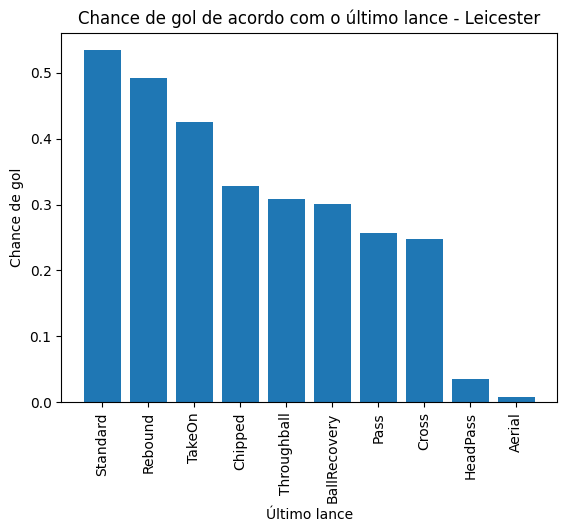

,lastAction,xG
7,Standard,0.533753
6,Rebound,0.491676
8,TakeOn,0.425268
2,Chipped,0.328037
9,Throughball,0.307707
1,BallRecovery,0.301516
5,Pass,0.256511
3,Cross,0.248084
4,HeadPass,0.035820
0,Aerial,0.008736


--------------------------------------------------------------------------------


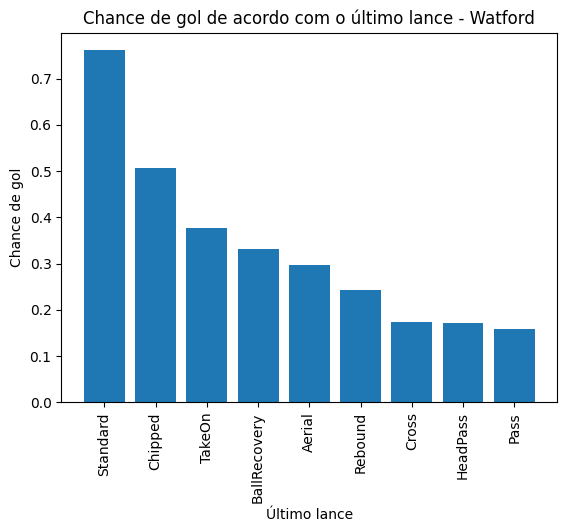

,lastAction,xG
7,Standard,0.761169
2,Chipped,0.507376
8,TakeOn,0.377015
1,BallRecovery,0.330650
0,Aerial,0.297006
6,Rebound,0.242153
3,Cross,0.173512
4,HeadPass,0.170683
5,Pass,0.158818


--------------------------------------------------------------------------------


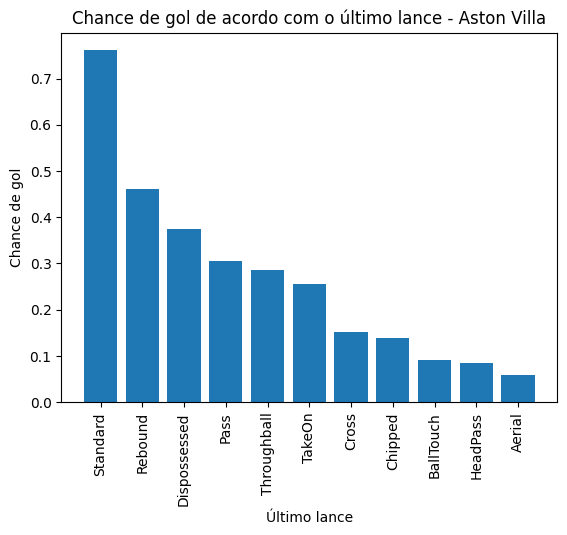

,lastAction,xG
8,Standard,0.761169
7,Rebound,0.461206
4,Dispossessed,0.375147
6,Pass,0.305145
10,Throughball,0.286618
9,TakeOn,0.255226
3,Cross,0.151238
2,Chipped,0.139868
1,BallTouch,0.090247
5,HeadPass,0.083949


--------------------------------------------------------------------------------


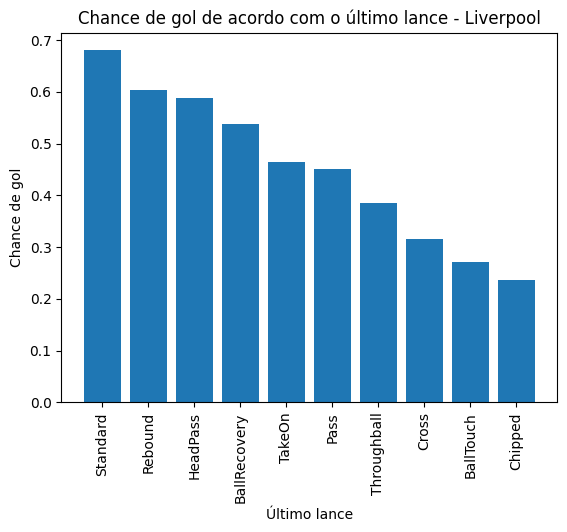

,lastAction,xG
7,Standard,0.680281
6,Rebound,0.602759
4,HeadPass,0.587665
0,BallRecovery,0.538275
8,TakeOn,0.464027
5,Pass,0.451793
9,Throughball,0.385667
3,Cross,0.315187
1,BallTouch,0.271646
2,Chipped,0.237111


--------------------------------------------------------------------------------


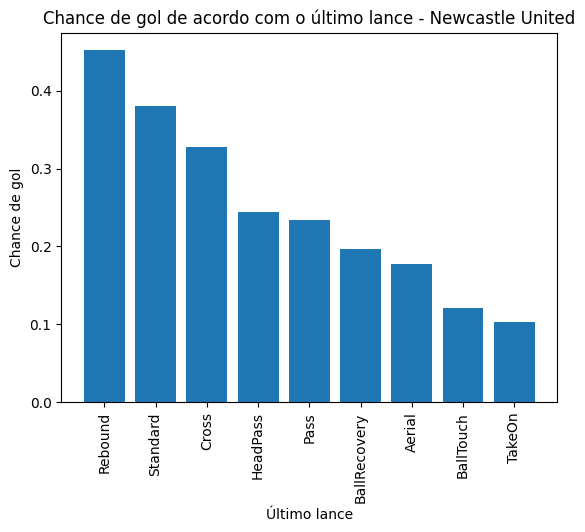

,lastAction,xG
6,Rebound,0.451709
7,Standard,0.380285
3,Cross,0.328077
4,HeadPass,0.244770
5,Pass,0.234380
1,BallRecovery,0.196513
0,Aerial,0.178055
2,BallTouch,0.120464
8,TakeOn,0.103108


--------------------------------------------------------------------------------


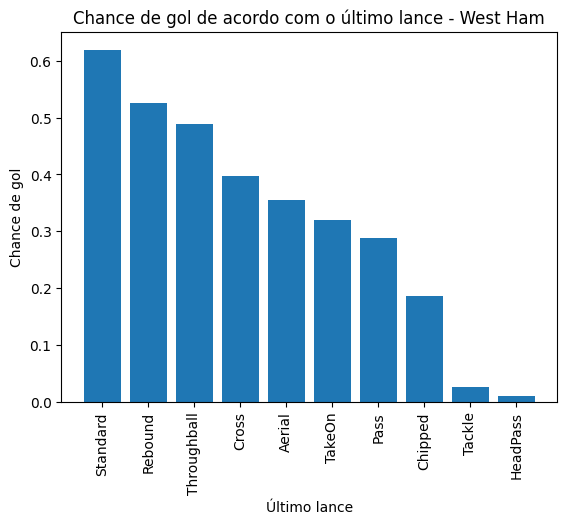

,lastAction,xG
6,Standard,0.619130
5,Rebound,0.524787
9,Throughball,0.488011
2,Cross,0.396697
0,Aerial,0.354784
8,TakeOn,0.320378
4,Pass,0.287743
1,Chipped,0.185425
7,Tackle,0.025936
3,HeadPass,0.009970


--------------------------------------------------------------------------------


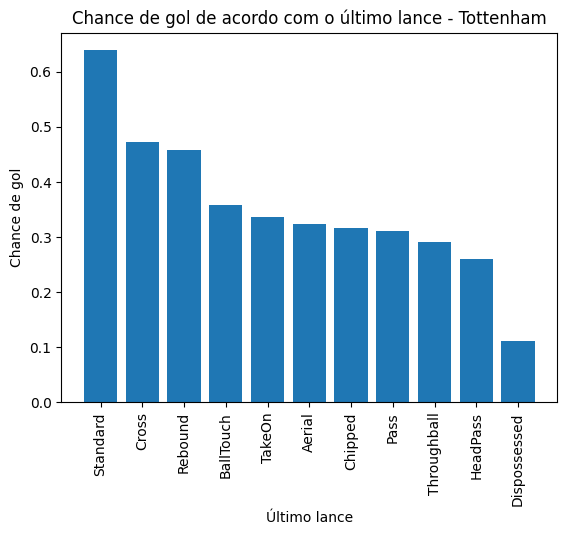

,lastAction,xG
8,Standard,0.638930
3,Cross,0.472354
7,Rebound,0.458669
1,BallTouch,0.358014
9,TakeOn,0.337013
0,Aerial,0.322853
2,Chipped,0.316915
6,Pass,0.311362
10,Throughball,0.290461
5,HeadPass,0.259638


--------------------------------------------------------------------------------


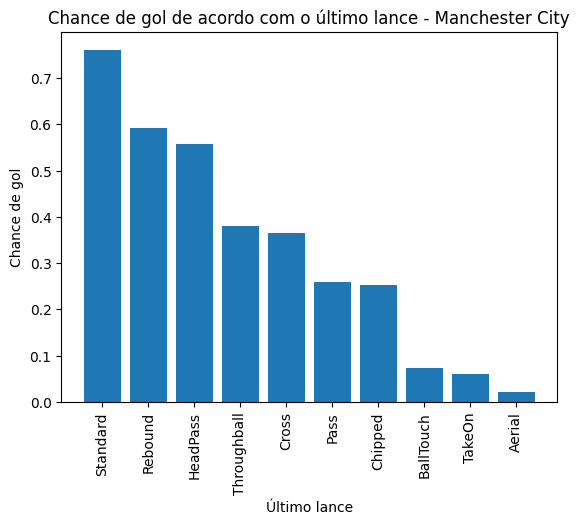

,lastAction,xG
7,Standard,0.761169
6,Rebound,0.592743
4,HeadPass,0.558063
9,Throughball,0.380233
3,Cross,0.364292
5,Pass,0.260019
2,Chipped,0.253682
1,BallTouch,0.073653
8,TakeOn,0.059177
0,Aerial,0.021804


--------------------------------------------------------------------------------


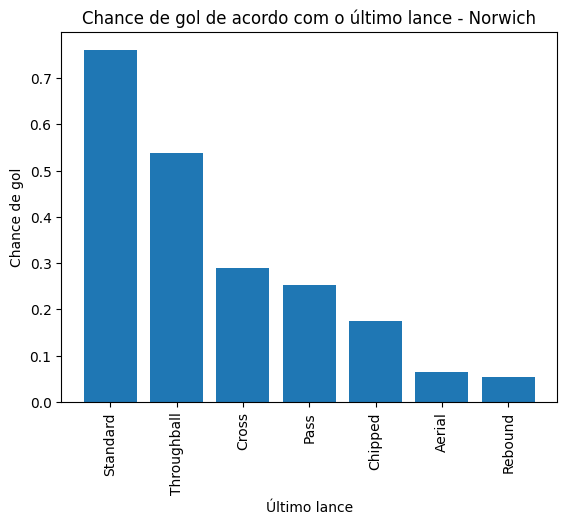

,lastAction,xG
5,Standard,0.761157
6,Throughball,0.538244
2,Cross,0.289767
3,Pass,0.252970
1,Chipped,0.175544
0,Aerial,0.064368
4,Rebound,0.053297


--------------------------------------------------------------------------------


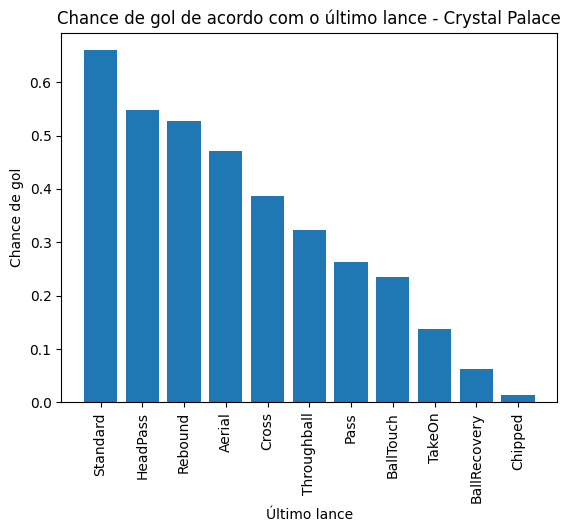

,lastAction,xG
8,Standard,0.659606
5,HeadPass,0.548085
7,Rebound,0.527644
0,Aerial,0.470118
4,Cross,0.387264
10,Throughball,0.322961
6,Pass,0.263306
2,BallTouch,0.234181
9,TakeOn,0.138190
1,BallRecovery,0.062957


--------------------------------------------------------------------------------


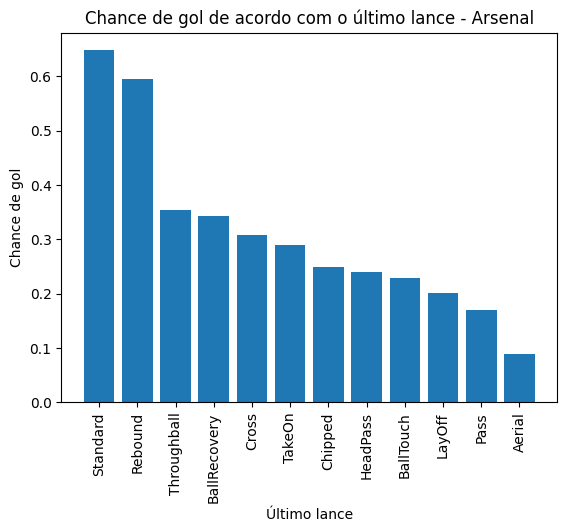

,lastAction,xG
9,Standard,0.647568
8,Rebound,0.594788
11,Throughball,0.353835
1,BallRecovery,0.343720
4,Cross,0.307981
10,TakeOn,0.289399
3,Chipped,0.248666
5,HeadPass,0.239960
2,BallTouch,0.228700
6,LayOff,0.200915


--------------------------------------------------------------------------------


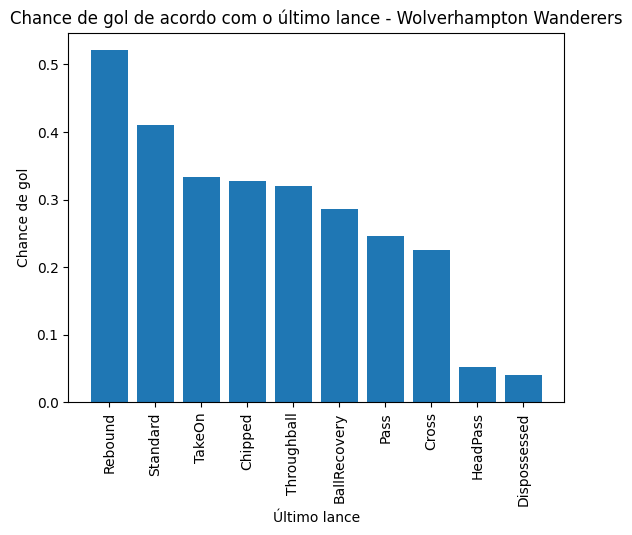

,lastAction,xG
6,Rebound,0.520974
7,Standard,0.409732
8,TakeOn,0.332845
1,Chipped,0.327615
9,Throughball,0.320096
0,BallRecovery,0.286210
5,Pass,0.245985
2,Cross,0.224703
4,HeadPass,0.051870
3,Dispossessed,0.040507


--------------------------------------------------------------------------------


In [151]:
for t in teams:
    df_aux = df_filt[df_filt.player_team == t]
    df_plot = df_aux.groupby("lastAction")["xG"].mean().reset_index().sort_values('xG', ascending=False)

    # Plot
    plt.bar(df_plot.lastAction, df_plot.xG)

    # Adicionar rótulos e título
    plt.xlabel('Último lance')
    plt.ylabel('Chance de gol')
    plt.title(f'Chance de gol de acordo com o último lance - {t}')
    plt.xticks(rotation='vertical')

    # Exibir o gráfico
    plt.show()

    df_display = df_aux.groupby("lastAction")["xG"].mean().reset_index()
    display(df_display.sort_values('xG', ascending=False))
    print("-"*80)

##### Insights:
- Times com características muitos distintas entre si, onde dependendo da última jogada feita na partida, a chance de sair gol pode variar bastante de equipe para equipe, sendo uma variável muito interessante de ser analisada e considerada no modelo.

### 5. Importância de se jogar fora ou dentro de casa 

In [105]:
df_filt = df_xg[(df_xg.league == 'EPL')&(df_xg.season == 2021)]
df_filt_home = df_filt[(df_filt.h_a == 'h')&(df_filt.result == 'Goal')]
df_filt_away = df_filt[(df_filt.h_a == 'a')&(df_filt.result == 'Goal')]
print(df_filt_home.shape)
print(df_filt_away.shape)

(552, 23)
(485, 23)


##### Insights:
- AAA

### 6. Avaliando a temporada de um jogador de acordo com as suas chances criadas

In [106]:
df_filt = df_xg[(df_xg.league == 'EPL')&(df_xg.season == 2021)]

##### Por gol

In [107]:
all_players = df_filt.player.unique()
xg_dfs = []
goals_dfs = []
for player in all_players:
    test = df_filt[df_filt.player == player]

    # xg df
    df_player = test.groupby("player")["xG"].sum().reset_index()
    xg_dfs.append(df_player)

    # goals df
    test = test[test.result == 'Goal']
    df_player = test.groupby("player")["result"].count().reset_index()
    goals_dfs.append(df_player)

players_xgs = pd.concat(xg_dfs).round(2)
players_goals = pd.concat(goals_dfs)
clean_df = players_xgs.merge(players_goals, how='left', on='player')
clean_df.fillna(0, inplace=True)
clean_df['diff'] = clean_df.result - clean_df.xG
clean_df

,player,xG,result,diff
0,Frank Onyeka,0.77,0.0,-0.77
1,Bryan Mbeumo,9.81,4.0,-5.81
2,Sergi Canos,3.49,3.0,-0.49
3,Christian Nørgaard,4.97,3.0,-1.97
4,Kieran Tierney,0.61,1.0,0.39
...,...,...,...,...
445,Dan Gosling,0.20,1.0,0.80
446,Toti,0.04,0.0,-0.04
447,Isaac Price,0.27,0.0,-0.27
448,Kenedy,0.05,0.0,-0.05


In [108]:
clean_df.sort_values('diff', ascending=True)

,player,xG,result,diff
1,Bryan Mbeumo,9.81,4.0,-5.81
19,Daniel James,7.71,4.0,-3.71
192,Harry Kane,20.69,17.0,-3.69
320,Alexandre Lacazette,7.63,4.0,-3.63
133,João Cancelo,4.54,1.0,-3.54
...,...,...,...,...
179,James Ward-Prowse,5.09,10.0,4.91
66,Jamie Vardy,9.99,15.0,5.01
204,James Maddison,6.50,12.0,5.50
129,Son Heung-Min,16.99,23.0,6.01


##### Por assistência

In [109]:
all_players = df_filt.player_assisted.unique()
xg_dfs = []
goals_dfs = []
for player in all_players:
    test = df_filt[df_filt.player_assisted == player]

    # xg df
    df_player = test.groupby("player_assisted")["xG"].sum().reset_index()
    xg_dfs.append(df_player)

    # goals df
    test = test[test.result == 'Goal']
    df_player = test.groupby("player_assisted")["result"].count().reset_index()
    goals_dfs.append(df_player)

players_xgs = pd.concat(xg_dfs).round(2)
players_goals = pd.concat(goals_dfs)
clean_df = players_xgs.merge(players_goals, how='left', on='player_assisted')
clean_df.fillna(0, inplace=True)
clean_df['diff'] = clean_df.result - clean_df.xG
clean_df

,player_assisted,xG,result,diff
0,nobody,319.62,296.0,-23.62
1,Ivan Toney,7.34,5.0,-2.34
2,Ethan Pinnock,1.72,1.0,-0.72
3,Frank Onyeka,0.16,0.0,-0.16
4,Kristoffer Ajer,2.21,3.0,0.79
...,...,...,...,...
432,Dan Gosling,0.05,0.0,-0.05
433,Samuel Kalu,0.29,0.0,-0.29
434,Martin Dubravka,0.03,0.0,-0.03
435,Mark Noble,0.02,0.0,-0.02


In [111]:
clean_df.sort_values('xG', ascending=False)

,player_assisted,xG,result,diff
0,nobody,319.62,296.0,-23.62
90,Trent Alexander-Arnold,12.69,12.0,-0.69
120,Kevin De Bruyne,11.26,8.0,-3.26
168,Harry Kane,9.82,9.0,-0.82
92,Mohamed Salah,9.79,12.0,2.21
...,...,...,...,...
277,Theo Walcott,0.02,0.0,-0.02
435,Mark Noble,0.02,0.0,-0.02
321,Nicolas N&#039;Koulou,0.01,0.0,-0.01
198,Taylor Richards,0.01,0.0,-0.01


## Insights Gerados
- Kane>>>>Messi>>>>CR7